**TF Representation**

{'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
[[1 1 0 1 0 1 1]
 [0 0 1 1 1 1 0]]


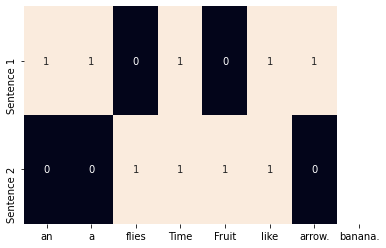

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']
vocab = set([word for sen in corpus for word in sen.split(" ")])

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()

print(one_hot_vectorizer.vocabulary_)
print(one_hot)

sns.heatmap(one_hot, annot=True,
            cbar=False,  xticklabels=vocab,
            yticklabels=[ 'Sentence 1','Sentence 2'])


**TF-IDF**
 
 TF-IDF = TF(w) * IDF(w)
  IDF=log2(n/k) (整个文档有n篇文章，而一个词语在k篇文章中出现）

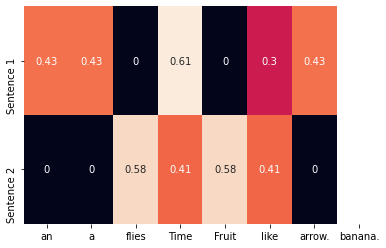

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels= [ 'Sentence 1','Sentence 2'])

# Pytorch Basic

In [4]:
# 创建描述函数
def describe(x):
    print("Type: {}".format(x.type()))
    print("Shape,size: {}".format(x.shape))
    print("Values: {}".format(x))

In [8]:
import torch

# 一般
a = torch.Tensor((3,3))
describe(a)

Type: torch.FloatTensor
Shape,size: torch.Size([2])
Values: tensor([3., 3.])


In [6]:
# 随机张量
r = torch.rand(2,2)
rr = torch.randn([2,2])
describe(r)
describe(rr)

Type: torch.FloatTensor
Shape,size: torch.Size([2, 2])
Values: tensor([[0.8952, 0.1259],
        [0.2493, 0.7242]])
Type: torch.FloatTensor
Shape,size: torch.Size([2, 2])
Values: tensor([[-0.2564, -0.7241],
        [-0.6527, -0.7310]])


In [10]:
zeros = torch.zeros(2,2,2)
ones = torch.ones(2,2,2,2)
describe(zeros)
describe(ones)

Type: torch.FloatTensor
Shape,size: torch.Size([2, 2, 2])
Values: tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])
Type: torch.FloatTensor
Shape,size: torch.Size([2, 2, 2, 2])
Values: tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


In [11]:
# tensor 和 numpy.array 转换
import numpy as np
npa = np.random.rand(2,2)
tora = torch.from_numpy(npa)
describe(tora)

Type: torch.DoubleTensor
Shape,size: torch.Size([2, 2])
Values: tensor([[0.5220, 0.3712],
        [0.3246, 0.2542]], dtype=torch.float64)


In [14]:
x = torch.FloatTensor([[1,1,1],[2,1,3]])
describe(x)

Type: torch.FloatTensor
Shape,size: torch.Size([2, 3])
Values: tensor([[1., 1., 1.],
        [2., 1., 3.]])


In [18]:
# 维度计算，行为0，列为1
x = torch.Tensor([[1,2,3],[1,2,3]])
describe(x)
print("*****两行之和*****")
row = torch.sum(x, dim=0)
describe(row)
print("*****两列之和*****")
col = torch.sum(x, dim=1)
describe(col)

Type: torch.FloatTensor
Shape,size: torch.Size([2, 3])
Values: tensor([[1., 2., 3.],
        [1., 2., 3.]])
*****两行之和*****
Type: torch.FloatTensor
Shape,size: torch.Size([3])
Values: tensor([2., 4., 6.])
*****两列之和*****
Type: torch.FloatTensor
Shape,size: torch.Size([2])
Values: tensor([6., 6.])


In [28]:
# 切片，联合
describe(x)
print('*'*40)
describe(x[:,:2])
print('*'*40)
describe(torch.cat([x,x], dim=1))
print('*'*40)
describe(torch.cat([x,x], dim=0))
print('*'*40)
describe(torch.stack([x,x], dim=0))

Type: torch.FloatTensor
Shape,size: torch.Size([2, 3])
Values: tensor([[1., 2., 3.],
        [1., 2., 3.]])
****************************************
Type: torch.FloatTensor
Shape,size: torch.Size([2, 2])
Values: tensor([[1., 2.],
        [1., 2.]])
****************************************
Type: torch.FloatTensor
Shape,size: torch.Size([2, 6])
Values: tensor([[1., 2., 3., 1., 2., 3.],
        [1., 2., 3., 1., 2., 3.]])
****************************************
Type: torch.FloatTensor
Shape,size: torch.Size([4, 3])
Values: tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]])
****************************************
Type: torch.FloatTensor
Shape,size: torch.Size([2, 2, 3])
Values: tensor([[[1., 2., 3.],
         [1., 2., 3.]],

        [[1., 2., 3.],
         [1., 2., 3.]]])


In [35]:
x1 = torch.arange(6).view(2, 3)  # 改变tensor 的size
x2 = torch.ones(3, 2).int()
describe(x1)
print('*'*40)
describe(x2)
print('*'*40)


Type: torch.LongTensor
Shape,size: torch.Size([2, 3])
Values: tensor([[0, 1, 2],
        [3, 4, 5]])
****************************************
Type: torch.IntTensor
Shape,size: torch.Size([3, 2])
Values: tensor([[1, 1],
        [1, 1],
        [1, 1]], dtype=torch.int32)
****************************************


In [45]:
import warnings
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)
print('*'*40)
y = 2*x + 3
describe(y)
print('*'*40)
z = y.mean()
describe(z)
print('*'*40)
print(z.backward())

Type: torch.FloatTensor
Shape,size: torch.Size([2, 2])
Values: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True
****************************************
Type: torch.FloatTensor
Shape,size: torch.Size([2, 2])
Values: tensor([[5., 5.],
        [5., 5.]], grad_fn=<AddBackward0>)
****************************************
Type: torch.FloatTensor
Shape,size: torch.Size([])
Values: 5.0
****************************************
None


In [46]:
a = torch.rand(3, 3) 
describe(x)
print('*'*40)
a.unsqueeze(0)

Type: torch.FloatTensor
Shape,size: torch.Size([2, 2])
Values: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
****************************************


tensor([[[0.2049, 0.8056, 0.0377],
         [0.7858, 0.8411, 0.8584],
         [0.6493, 0.5969, 0.5997]]])

In [47]:
a.squeeze(0)

tensor([[0.2049, 0.8056, 0.0377],
        [0.7858, 0.8411, 0.8584],
        [0.6493, 0.5969, 0.5997]])

In [48]:
3 + torch.rand(5, 3) * (7 - 3)

tensor([[5.5933, 5.5802, 3.4511],
        [3.4790, 5.4937, 6.4230],
        [6.6700, 3.0906, 5.7147],
        [6.7260, 4.3187, 6.2326],
        [3.6653, 5.2467, 3.1320]])

In [50]:
a = torch.rand(3, 3) 
a.normal_()

tensor([[-1.1377,  1.3856, -0.2815],
        [-0.3686,  0.0093,  0.6929],
        [ 0.3080, -0.4599, -0.9196]])